UAS Deep Learning No. 2

Nama: Janice Ashley Kurniawan

NIM: 2602203794

# 2A

In [11]:
import os
import gzip
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Dense, Reshape
from skimage.metrics import structural_similarity as ssim
from keras.optimizers import Adam

In [12]:
!unzip FashionMNIST.zip

Archive:  FashionMNIST.zip
replace t10k-images-idx3-ubyte.gz? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: t10k-images-idx3-ubyte.gz  
  inflating: __MACOSX/._t10k-images-idx3-ubyte.gz  
  inflating: t10k-labels-idx1-ubyte.gz  
  inflating: __MACOSX/._t10k-labels-idx1-ubyte.gz  
  inflating: train-images-idx3-ubyte.gz  
  inflating: __MACOSX/._train-images-idx3-ubyte.gz  
  inflating: train-labels-idx1-ubyte.gz  
  inflating: __MACOSX/._train-labels-idx1-ubyte.gz  


In [13]:
# function to load the images and labels

def load_mnist_images(file_path):
    with gzip.open(file_path, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)
    return data.reshape(-1, 28, 28)

def load_mnist_labels(file_path):
    with gzip.open(file_path, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=8)
    return data

In [14]:
# paths to the downloaded dataset files
train_images_path = './train-images-idx3-ubyte.gz'
train_labels_path = './train-labels-idx1-ubyte.gz'
test_images_path = './t10k-images-idx3-ubyte.gz'
test_labels_path = './t10k-labels-idx1-ubyte.gz'

# load the data
x_train = load_mnist_images(train_images_path)
y_train = load_mnist_labels(train_labels_path)
x_test = load_mnist_images(test_images_path)
y_test = load_mnist_labels(test_labels_path)

In [15]:
# filter only Pullover (class 2) and Dress (class 3)
used_classes = [2, 3]
train_mask = np.isin(y_train, used_classes)
test_mask = np.isin(y_test, used_classes)

x_train = x_train[train_mask]
y_train = y_train[train_mask]
x_test = x_test[test_mask]
y_test = y_test[test_mask]

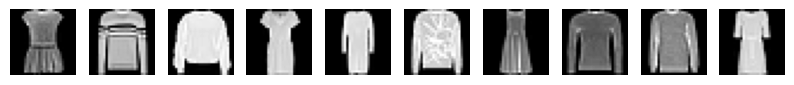

In [16]:
# display example images
num_examples = 10
plt.figure(figsize=(10, 1))
for i in range(num_examples):
    plt.subplot(1, num_examples, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()

In [17]:
# reshape data to (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# scale data to [0, 1] range
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [18]:
# split dataset into train (80%), validation (10%), and test (10%) sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

print(f'Training set size: {x_train.shape}')
print(f'Validation set size: {x_val.shape}')
print(f'Test set size: {x_test.shape}')

Training set size: (9600, 28, 28, 1)
Validation set size: (2400, 28, 28, 1)
Test set size: (2000, 28, 28, 1)


# 2B

In [19]:
# encoder
input_img = Input(shape=(28, 28, 1))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Flatten()(x)
encoded = Dense(128, activation='relu')(x) # Latent

# decoder
x = Dense(6272, activation='relu')(encoded)
x = Reshape((14, 14, 32))(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# autoencoder model
autoencoder = Model(input_img, decoded)
autoencoder.summary()
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               802944    
                                                                 
 dense_3 (Dense)             (None, 6272)              809088    
                                                           

In [20]:
# train the model
autoencoder.fit(x_train, x_train,
                epochs=30,
                batch_size=256,
                shuffle=True,
                validation_data=(x_val, x_val))

Epoch 1/30
38/38 [==============================] - 5s 31ms/step - loss: 0.4390 - val_loss: 0.3609
Epoch 2/30
38/38 [==============================] - 1s 13ms/step - loss: 0.3428 - val_loss: 0.3218
Epoch 3/30
38/38 [==============================] - 0s 13ms/step - loss: 0.3205 - val_loss: 0.3089
Epoch 4/30
38/38 [==============================] - 1s 13ms/step - loss: 0.3103 - val_loss: 0.3013
Epoch 5/30
38/38 [==============================] - 1s 15ms/step - loss: 0.3041 - val_loss: 0.2965
Epoch 6/30
38/38 [==============================] - 1s 15ms/step - loss: 0.2999 - val_loss: 0.2936
Epoch 7/30
38/38 [==============================] - 1s 15ms/step - loss: 0.2971 - val_loss: 0.2906
Epoch 8/30
38/38 [==============================] - 1s 18ms/step - loss: 0.2947 - val_loss: 0.2886
Epoch 9/30
38/38 [==============================] - 1s 13ms/step - loss: 0.2928 - val_loss: 0.2875
Epoch 10/30
38/38 [==============================] - 0s 13ms/step - loss: 0.2915 - val_loss: 0.2858
Epoch 11/

In [21]:
# evaluate the model using ssim
def evaluate_ssim(model, x_test):
    decoded_imgs = model.predict(x_test)
    ssim_values = []
    for i in range(len(x_test)):
        ssim_value = ssim(x_test[i].reshape(28, 28), decoded_imgs[i].reshape(28, 28), data_range=1.0)
        ssim_values.append(ssim_value)
    return np.mean(ssim_values)

In [22]:
ssim_baseline = evaluate_ssim(autoencoder, x_test)
print(f"SSIM for Baseline Autoencoder: {ssim_baseline}")

63/63 [==============================] - 1s 4ms/step
SSIM for Baseline Autoencoder: 0.8245320779130688


1/1 [==============================] - 0s 17ms/step


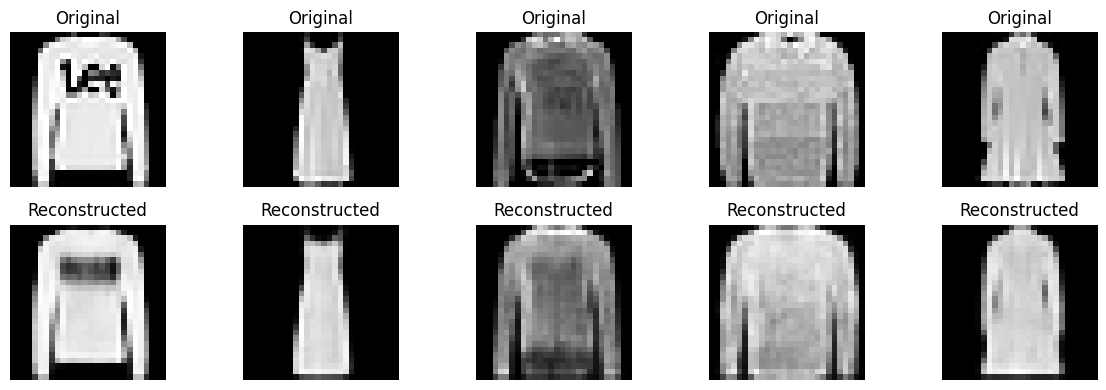

In [23]:
# reconstruct some images and display them
num_images = 5
plt.figure(figsize=(12, 4))

for i in range(num_images):
    # original images
    plt.subplot(2, num_images, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')
    # reconstructed images
    reconstructed_img = autoencoder.predict(np.expand_dims(x_test[i], axis=0)).reshape(28, 28)
    plt.subplot(2, num_images, num_images + i + 1)
    plt.imshow(reconstructed_img, cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

plt.tight_layout()
plt.show()

### **Evaluasi**

- Training Loss: 0.2799
> Ini adalah nilai loss yang dicapai model pada data pelatihan. Nilai ini menunjukkan seberapa baik model dapat merekonstruksi data input yang telah dilatih.

- Validation Loss: 0.2759
> Ini adalah nilai loss yang dicapai model pada data validasi. Nilai ini penting karena menunjukkan seberapa baik model dapat generalisasi ke data baru yang belum pernah dilihat selama pelatihan.

- SSIM for Baseline Autoencoder: 0.8245320779130688
> SSIM (Structural Similarity Index) adalah metrik yang mengukur kesamaan antara dua gambar. Nilai SSIM berkisar antara -1 dan 1, di mana nilai 1 menunjukkan kesamaan yang sempurna dan nilai yang lebih rendah menunjukkan lebih banyak perbedaan.

**Interpretasi Hasil Loss dan SSIM**
- Dari epoch 1-50, training loss dan validation loss menurun secara konsisten dan bersamaan. Perbedaan yang kecil antaranya (0.2799 dan 0.2759) menunjukkan bahwa model tidak overfit. Model memiliki performa yang cukup stabil pada data yang belum dilihat sebelumnya.
- Nilai loss yang relatif rendah sekitar 0.28 menunjukkan bahwa model memiliki kesalahan yang cukup rendah dalam merekonstruksi gambar input. Ini berarti bahwa model dapat belajar representasi latent yang baik dari data input.
- Nilai SSIM sekitar 0.82453 menunjukkan bahwa rekonstruksi gambar oleh autoencoder memiliki kualitas yang baik dan sangat mirip dengan gambar aslinya. Ini adalah indikasi positif bahwa model dapat mempertahankan detail penting dari gambar input.

**Kesimpulan**
> Secara keseluruhan, hasil evaluasi menunjukkan bahwa model autoencoder bekerja dengan baik dalam merekonstruksi gambar. Dengan training loss dan validation loss yang rendah serta nilai SSIM yang tinggi, model ini menunjukkan kemampuan yang baik dalam menangkap dan merekonstruksi detail penting dari gambar input.

# 2C

In [24]:
# encoder
input_img = Input(shape=(28, 28, 1))
x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Flatten()(x)
encoded = Dense(128, activation='relu')(x)

# decoder
x = Dense(7 * 7 * 128, activation='relu')(encoded)
x = Reshape((7, 7, 128))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# autoencoder model
autoencoder = Model(input_img, decoded)
autoencoder.summary()
autoencoder.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy')

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 128)         0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 6272)              0   

In [25]:
# train the model
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_val, x_val))

Epoch 1/50
75/75 [==============================] - 4s 19ms/step - loss: 0.4035 - val_loss: 0.3345
Epoch 2/50
75/75 [==============================] - 1s 15ms/step - loss: 0.3285 - val_loss: 0.3146
Epoch 3/50
75/75 [==============================] - 1s 15ms/step - loss: 0.3140 - val_loss: 0.3027
Epoch 4/50
75/75 [==============================] - 1s 16ms/step - loss: 0.3063 - val_loss: 0.2969
Epoch 5/50
75/75 [==============================] - 1s 16ms/step - loss: 0.3003 - val_loss: 0.2923
Epoch 6/50
75/75 [==============================] - 1s 15ms/step - loss: 0.2971 - val_loss: 0.2920
Epoch 7/50
75/75 [==============================] - 1s 14ms/step - loss: 0.2953 - val_loss: 0.2888
Epoch 8/50
75/75 [==============================] - 1s 14ms/step - loss: 0.2925 - val_loss: 0.2860
Epoch 9/50
75/75 [==============================] - 1s 15ms/step - loss: 0.2907 - val_loss: 0.2855
Epoch 10/50
75/75 [==============================] - 1s 15ms/step - loss: 0.2892 - val_loss: 0.2840
Epoch 11/

In [26]:
# evaluate the model with SSIM
ssim_modified = evaluate_ssim(autoencoder, x_test)
print(f"SSIM for Modified Autoencoder: {ssim_modified}")

63/63 [==============================] - 1s 5ms/step
SSIM for Modified Autoencoder: 0.8366257597957304


### **Modifikasi Arsitektur Autoencoder**

- Penambahan Conv2D dan MaxPooling2D (Encoder):
> Perubahan: Saya menambahkan lapisan Conv2D dengan 64 filter dan kernel size (3, 3), serta lapisan MaxPooling2D untuk mengurangi dimensi gambar secara bertahap.
> Alasan: Dengan menambahkan lebih banyak filter dan lapisan MaxPooling2D, kita dapat mengekstraksi fitur-fitur yang lebih kompleks dari gambar, yang seharusnya membantu dalam menangkap detail-detail yang lebih halus dari data gambar.

- Penambahan Conv2D dengan 128 filter (Encoder):
> Perubahan: Saya menambahkan lapisan Conv2D kedua dengan 128 filter dan kernel size (3, 3).
> Alasan: Ini bertujuan untuk meningkatkan kapasitas model dalam mengekstraksi fitur-fitur yang lebih abstrak dan kompleks dari gambar. Dengan menambahkan lapisan ini, diharapkan model dapat mempelajari representasi yang lebih baik dari data yang ada.

- Penyesuaian Dense Layer (Decoder):
> Perubahan: Saya mengubah lapisan Dense menjadi Dense(77128) untuk mencocokkan dengan dimensi yang dihasilkan dari Reshape((7, 7, 128)).
> Alasan: Hal ini penting karena Reshape yang sesuai membantu dalam membangun kembali representasi gambar dari representasi laten. Dengan dimensi yang sesuai, diharapkan rekonstruksi gambar akan menjadi lebih akurat.

- Penyesuaian Conv2D pada Decoder:
> Perubahan: Saya menyesuaikan lapisan Conv2D pada decoder untuk mencoba mempertahankan informasi yang lebih baik dari gambar yang dihasilkan.
> Alasan: Dengan menggunakan lebih banyak lapisan Conv2D, model dapat mempelajari lebih banyak fitur-fitur detail dari representasi laten, yang seharusnya menghasilkan rekonstruksi gambar yang lebih baik.


- Tuning Hyperparameter
> Dengan menyesuaikan learning rate, batch size, dan penggunaan regularisasi, kita dapat memperbaiki konvergensi model, mengurangi overfitting, dan meningkatkan kemampuan generalisasi.

- Menambahkan Jumlah Epochs
> Saya menambahkan jumlah epochs dari 30 jadi 50.

---

### **Analisis Metric Evaluation menggunakan SSIM untuk Baseline dan Modified Autoencoder**

> SSIM for Baseline Autoencoder: 0.8245320779130688

> SSIM for Modified Autoencoder: 0.8366257597957304

Dalam evaluasi performa autoencoder, nilai Structural Similarity Index (SSIM) digunakan untuk membandingkan kualitas rekonstruksi antara model baseline dan model yang dimodifikasi. Hasil menunjukkan bahwa model autoencoder yang dimodifikasi memiliki nilai SSIM yang lebih tinggi (0.837) dibandingkan dengan model baseline (0.825). Kenaikan nilai SSIM ini menunjukkan bahwa model yang dimodifikasi mampu menghasilkan rekonstruksi gambar yang lebih mendekati aslinya secara visual, menunjukkan peningkatan dalam kemampuan model untuk mempertahankan detail dan struktur dari data inputnya.


# 2D

Link Video Presentasi: https://drive.google.com/drive/folders/11YjTq-A5A8KazrkfAo_pEhYbpdW6fWrs?usp=drive_link